# Prova 2:Exercicio 1

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab


<img src="controle.png" width=400 alt="Problema">

$ y_p = - n_1 \cdot \frac{s + n_2}{s^2 + n_3 \cdot s + n_4} \cdot u_p $,

Sendo NUSP= 11800910, $n_1 = 9$, $n_2 = 8$, $n_3 = 1$ e $n_4 = 0$

Logo: 
$ y_p = - 9 \cdot \frac{s + 8}{s^2 + 1 \cdot s} \cdot u_p $,

com modelo de referência: $y_m = \frac{4}{s + 5} \cdot r$


In [149]:
n1 = 9
n2 = 8
n3 = 1
n4 = 0

In [150]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

ftp = -n1 * (s + n2) / (s**2 + n3*s + n4)

ftm = 4 / (s + 5)

ftp

TransferFunction(array([ -9., -72.]), array([1., 1., 0.]))

In [151]:
# Parâmetros de simulação
N = 50
dt = 0.001  # Taxa de amostragem
T = np.arange(0, N + dt, dt)

r = 5*np.ones(len(T))  # referência
# r = np.sin(np.pi*T/3)

$ r = sin(\frac{\pi \cdot T}{3}) $

/home/tommaselli/.local/lib/python3.8/site-packages/control/timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


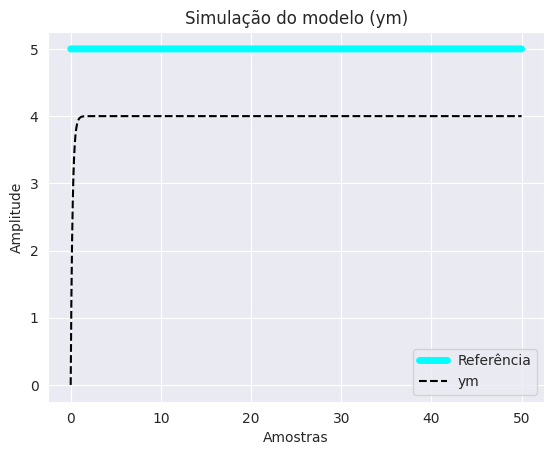

In [152]:
# Simulação dos modelos
ym, T, _ = matlab.lsim(ftm, r, T)

# Plotagem dos resultados juntos
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], r[:corte], label='Referência', color='cyan', linewidth=5)
plt.plot(T[:corte], ym[:corte], label='ym', color='black', linestyle='--', linewidth=1.5)



plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do modelo (ym)')

plt.legend()
plt.show()

$(1 - \theta _1 ^* \cdot \frac{1}{s+2}) \cdot (\frac{-9 \cdot s - 72}{s^2 + s }) = c_0 ^* \cdot r + (\theta _3 ^* + \theta _2 ^* \cdot \frac{1}{s+2})\cdot y_p$

$\begin{bmatrix}    0 & 0 & 0 & -9 \\    4 & 0 & -36 & -135 \\    4 & -36 & -360 & -594 \\    0 & -288 & -576 & -720\end{bmatrix}\begin{bmatrix}    \theta_1^* \\    \theta_2^* \\    \theta_3^* \\    c_0 ^* \end{bmatrix} = \begin{bmatrix}     4 \\     12 \\     8 \\    0 \end{bmatrix}$

In [153]:
import numpy as np

# Define the coefficients matrix A and the constants vector b
A = np.array([[0, 0, 0, -9], [4, 0, -36, -135], [4, -36, -360, -594], [0, -288, -576, -720]])
b = np.array([4, 12, 8, 0])

# Solve the linear system of equations
theta1, theta2, theta3, c0 = np.linalg.solve(A, b)

# Print the solution

print(f'Soluções: {theta1:.3f}, {theta2:.3f}, {theta3:.3f}, {c0:.3f}')


Soluções: -6.000, -0.222, 0.667, -0.444


$\theta _1 ^* = -6.00, \ \theta _2 ^* = -0.22, \ \theta _3 ^* = 0.67 \ e \ c_0 ^* =  -0.44$

$u_p = \frac{1}{s + 2} \cdot (-6) \cdot u_p + \frac{1}{s + 2} \cdot (-0.222) \cdot y_p + (0.667) \cdot y_p + (-0.444) \cdot r$

---

$u_p = \frac{1}{s + 2} \cdot \theta_1 ^* \cdot u_p + \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r$

$u_p \cdot (1 - \frac{1}{s + 2} \cdot \theta_1 ^*) =  \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r $

Pela expressão original, tomaremos que $y_p = - 9 \cdot \frac{s + 8}{s^2 + 1 \cdot s} \cdot u_p = \xi \cdot u_p$

$y_p \cdot \frac{1}{\xi} \cdot (1 - \frac{1}{s + 2} \cdot \theta_1 ^*) =  \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r $

$y_p \cdot [\frac{1}{\xi} \cdot (1 - \frac{1}{s + 2} \cdot \theta_1 ^*)- ( \frac{1}{s + 2} \cdot \theta_2 ^* + \theta_3 ^* )] =  c_0 ^* \cdot r $

$\frac{y_p}{r} =  \frac{c_0 ^*}{\frac{1}{\xi} \cdot (1 - \frac{1}{s + 2} \cdot \theta_1 ^*)- ( \frac{1}{s + 2} \cdot \theta_2 ^* + \theta_3 ^* )}$

In [154]:
s = matlab.tf('s')

xi = -9 * ((s + 8) / (s**2 + s))

ft1 = (1 - (theta1/(s+2)))/xi
ft2 = ((theta2/(s+2)) + theta3)
ftx = c0 / [ft1 - ft2]

ftx[0]

TransferFunction(array([  4.,  48., 144., 128.]), array([  1.,  17.,  96., 212., 160.]))

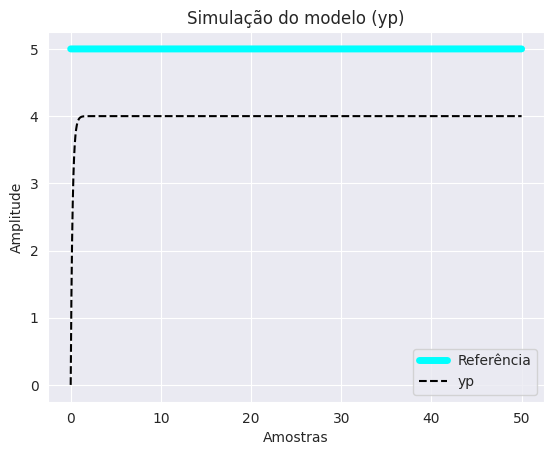

In [155]:
yp, T, _ = matlab.lsim(ftx[0], r, T)

# Plotagem dos resultados juntos
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], r[:corte], label='Referência', color='cyan', linewidth=5)
plt.plot(T[:corte], yp[:corte], label='yp', color='black', linestyle='--', linewidth=1.5)



plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do modelo (yp)')

plt.legend()
plt.show()

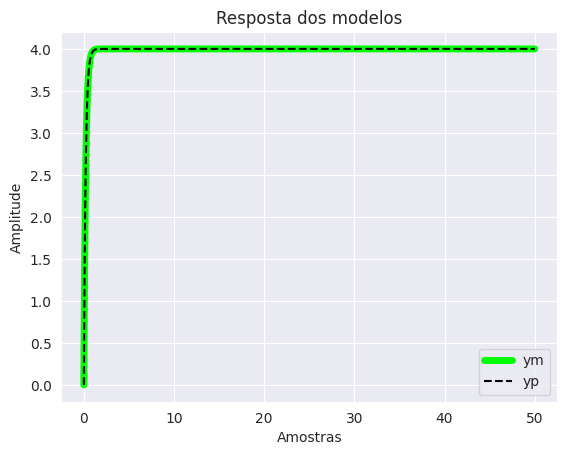

In [156]:
# Gráfico das respostas de yp e ym com entrada de referência r
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], ym[:corte], label='ym', color='lime', linewidth=5)
plt.plot(T[:corte], yp[:corte], label='yp', color='black', linestyle='--', linewidth=1.5)

plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Resposta dos modelos')

plt.legend()

plt.show()


$y_p = - 9 \cdot \frac{s + 8}{s^2 + s} \cdot u_p$

$y_p \cdot (s^2 + s) = - 9 \cdot (s + 8) \cdot u_p$

$y_p \cdot s^2 + y_p \cdot s + 9 \cdot u_p \cdot s + 72 \cdot u_p = 0$

Sendo $y_p \cdot s^2 = \frac{d^2 y_p}{dt^2} = y''$, $y_p \cdot s = \frac{d y_p}{dt} = y'$ e $u_p \cdot s = \frac{d u_p}{dt} = u'$

$y'' + y' + 9 \cdot u' + 72 \cdot u = 0$

Formulando pelo método de Euler com $x_1 = y$ e $x_2 = y'$:

$x_1' = x_2$

$x_2' = -x_2 - 9 \cdot u' - 72 \cdot u$

$u_p = \frac{1}{s + 2} \cdot \theta_1 ^* \cdot u_p + \frac{1}{s + 2} \cdot \theta_2 ^* \cdot y_p + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r$

$u_p = \omega _1 \cdot \theta_1 ^* + \omega _2 \cdot \theta_2 ^* + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r$

Sendo: $\omega _1 = \frac{1}{s + 2} \cdot u_p$ e $\omega _2 = (\frac{1}{s + 2}) \cdot y_p$

Ou seja, $\omega _1 \cdot (s + 2) = u_p \rightarrow \omega _1 \cdot s + 2 \cdot \omega _1 = u_p \rightarrow \omega _1 '= - 2 \cdot \omega _1 + u_p $

Logo, $\omega _2 '= - 2 \cdot \omega _2 + u_p $

In [157]:
# Parameters of the simulation
# dt = 1e-4
# T = np.arange(0, 10, dt)

# Initial conditions
w1 = np.ones_like(T)
w2 = np.ones_like(T)
ym = np.ones_like(T)
y1 = np.zeros_like(T)
y2 = np.zeros_like(T)
up = np.zeros_like(T)

# Reference input
#r = 10 * np.ones_like(T)

$u_p = \omega _1 \cdot \theta_1 ^* + \omega _2 \cdot \theta_2 ^* + \theta_3 ^* \cdot y_p + c_0 ^* \cdot r$

$x_2' = -x_2 - 9 \cdot u' - 72 \cdot u$

In [158]:
# Control loop
for k in range(len(T) - 1):
    # Reference model calculation
    ym[k + 1] = dt * (-5 * ym[k] + 4 * r[k]) + ym[k]

    # Control signal calculation
    w1[k + 1] = dt * (-2 * w1[k] + up[k]) + w1[k]
    w2[k + 1] = dt * (-2 * w2[k] + y1[k]) + w2[k]
    up[k + 1] = theta1 * w1[k + 1] + theta2 * w2[k + 1] + theta3 * y1[k] - c0 * r[k + 1]

    # Future state calculation
    y1[k + 1] = dt * y2[k] + y1[k]
    y2[k + 1] = dt * (-1* y2[k] - 72 * up[k]) - 9 * (up[k + 1] - up[k]) + y2[k]


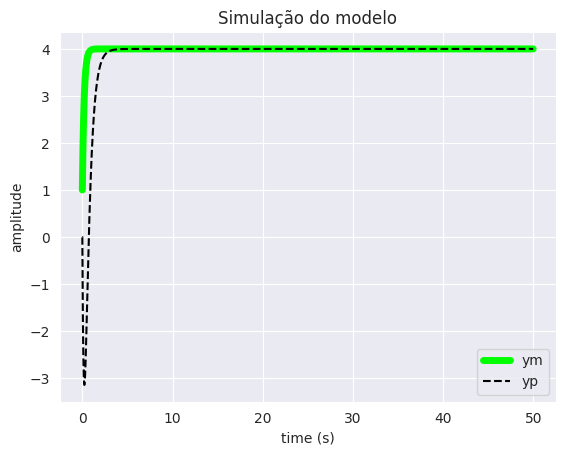

In [159]:
# Plotting the responses
plt.figure()
corte = int(np.ceil(1*(len(T))))
plt.plot(T[:corte], ym[:corte], label='ym', color='lime', linewidth=5)
plt.plot(T[:corte], -y1[:corte], label='yp', color='black', linestyle='--', linewidth=1.5)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('Simulação do modelo')
plt.legend()
plt.show()